In [90]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [91]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [127]:
path=os.path.join(os.path.dirname(os.path.realpath('machine_learning.py')), 'data')
car=[]
X=[]
y=[]
file=os.listdir(path+'/Cars/')
print(file)
for i in file:
    f=os.listdir(path+'/Cars/'+i)
    for j in f:
        p=pd.read_csv(path+"/Cars/"+i+"/"+j,header=None)
        p=p.to_numpy()
        car.append(p)
        X.append(p)
        d=[1,0,0]
        y.append(d)
print("done car")
drone=[]
file=os.listdir(path+'/Drones/')
for i in file:
    f=os.listdir(path+'/Drones/'+i)
    for j in f:
        p=pd.read_csv(path+"/Drones/"+i+"/"+j,header=None)
        p=p.to_numpy()
        drone.append(p)
        X.append(p)
        d=[0,1,0]
        y.append(d)
print("done drone")        
people=[]
file=os.listdir(path+'/People/')
for i in file:
    f=os.listdir(path+'/People/'+i)
    for j in f:
        p=pd.read_csv(path+"/People/"+i+"/"+j,header=None)
        p=p.to_numpy()
        people.append(p)
        X.append(p)
        d=[0,0,1]
        y.append(d)
print("done people")

['13-13', '13-13p', '13-19', '13-23', '13-23p', '13-29', '13-38', '13-44', '13-49', '13-49p', '13-54', '15-37', '15-37p', '15-42', '15-42p', '15-48', '15-48p', '15-55', '15-55a', '15-55m', '15-55p', '16-01', '16-01p', '16-07', '16-07p', '17-09', '17-09p']
done car
done drone
done people


(5720, 11, 61)
(5065, 11, 61)
(6700, 11, 61)


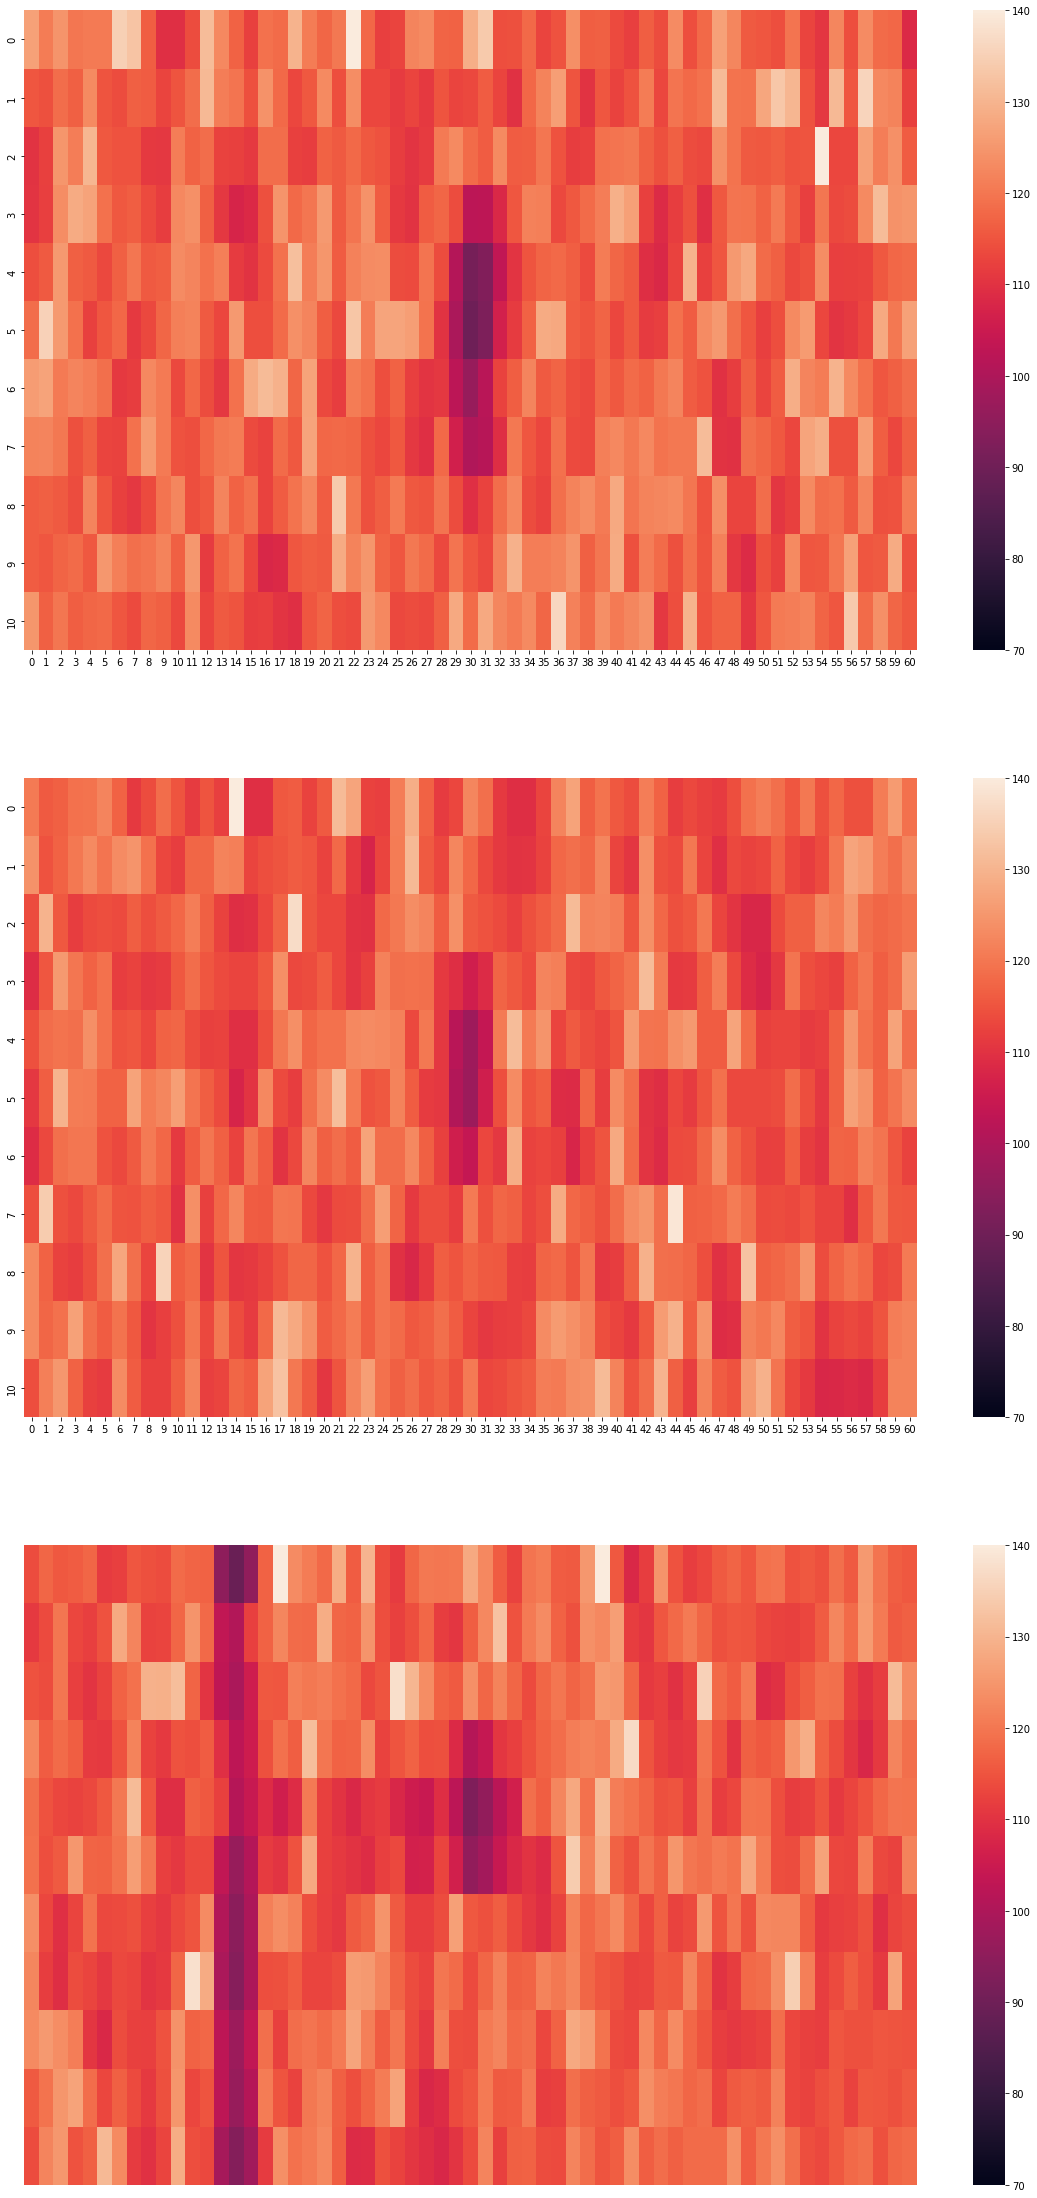

In [128]:
car=np.asarray(car)
car=np.absolute(car)
drone=np.absolute(drone)
people=np.absolute(people)
fig, axes = plt.subplots(3, 1, figsize=(20, 40))
plt.axis('off')
img_list = [car, drone, people]
for i, img in enumerate(img_list):
    sns.heatmap(img[20],vmin=70,vmax=140,ax=axes[i])
    print(np.shape(img))

In [129]:
len(x)


17913

TypeError: list indices must be integers or slices, not tuple

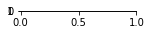

In [135]:
figure = plt.figure(figsize=(27, 9))
i = 1
# preprocess dataset, split into training and test part
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

# x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                         np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(X), len(classifiers) + 1, i)
if X == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
            edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
            edgecolors='k')
ax.set_xlim(X.min(), X.max())
ax.set_ylim(y.min(), y.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(X), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()